In [81]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
def generate_data(n, b0=0.5, b1=1, b2=1):
    X = np.random.normal(loc=0, scale=1, size=(n, 2))
    p = 1/(1+np.exp(-(b0+b1*X[:,0]+b2*X[:,1])))
    y = np.random.binomial(n=1, p=p, size=n)
    return X, y

def run_experiment(L, n):
    b_est = []
    b_true = np.array([0.5, 1, 1])
    for i in range(L):
        X, y = generate_data(n=n)
        lr = LogisticRegression(penalty=None, random_state=11, max_iter=1000)
        lr.fit(X, y)
        est = [lr.intercept_[0], lr.coef_[0, 0], lr.coef_[0, 1]]
        b_est.append(est)
    b_est = np.array(b_est)
    mse = np.sum(np.abs(b_est - b_true)**2) / (b_est.shape[0]-1)
    return mse

def experiment_series():
    experiment_size = [10*(i+5) for i in range(5)] + [100*(i+1) for i in range(10)]
    mse_list = np.array([(n, run_experiment(L=100, n=n)) for n in experiment_size])
    pd_mse_list = pd.DataFrame(data=mse_list, columns=["n", "MSE"])
    return pd_mse_list



In [102]:
mse = experiment_series()

In [103]:
mse["n"] = mse["n"].astype(int)

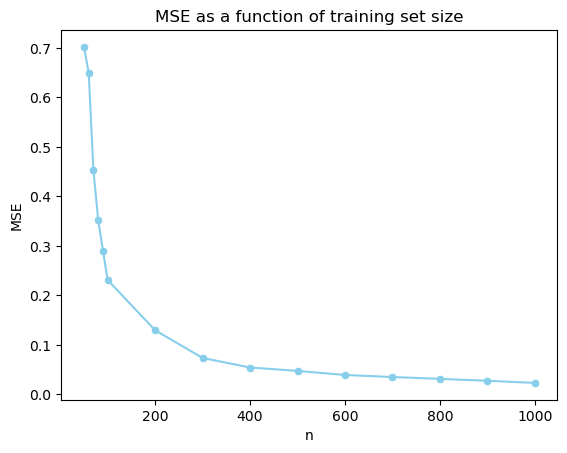

In [109]:
fig, ax = plt.subplots()
sns.lineplot(data=mse, x="n", y="MSE", color="skyblue", ax=ax)
sns.scatterplot(data=mse, x="n", y="MSE", color="skyblue", ax=ax)
plt.title("MSE as a function of training set size")
plt.show()

In [110]:
fig.savefig("output\\LogisticSimulatedData1.pdf")